In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data 
from keras.models import load_model
import streamlit as st

In [3]:
df= pd.read_csv("C:\\Users\\DELL\\Downloads\\New folder (3)\\Reliance Industries 1996 to 2020.csv")

In [4]:
st.title('Reliance Stock prediction Analysis')

2023-02-09 10:11:03.662 
  command:

    streamlit run c:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [5]:
user_input = st.text_input('Enter Stock Ticker', 'RELIANCE')

In [6]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
2,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
3,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
4,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,23-11-2020,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.083700e+15,497781.0,5148955.0,0.2461
6201,24-11-2020,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.787040e+15,362587.0,3213843.0,0.2251
6202,25-11-2020,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.965870e+15,356793.0,3040444.0,0.2019
6203,26-11-2020,RELIANCE,EQ,1947.80,1953.05,1965.00,1930.05,1957.00,1952.60,1946.67,11924527,2.321310e+15,266412.0,3406506.0,0.2857


In [7]:
#Describing Data
st.subheader('Data from Reliance 1996-2020')
st.write(df.describe())

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

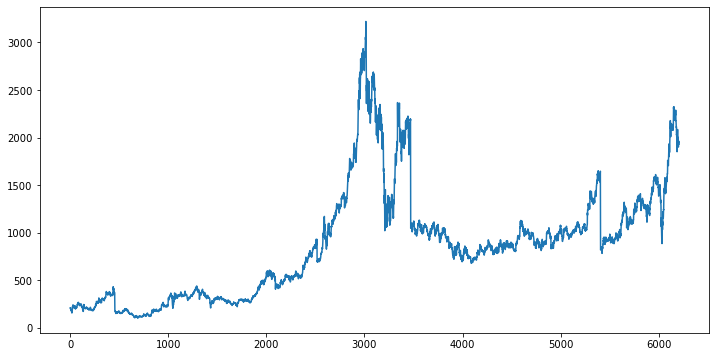

In [8]:
#visualization
st.subheader('Closing Price vs Time chart')
fig = plt.figure(figsize =(12,6))
plt.plot(df.Close)
st.pyplot(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

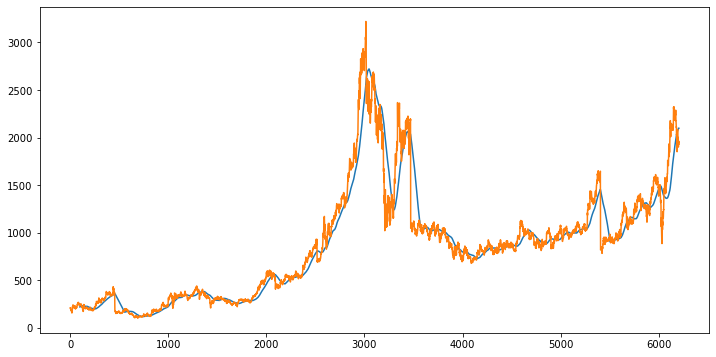

In [9]:
st.subheader('Closing Price vs Time chart with 100MA')
ma100 = df.Close.rolling(100).mean()
fig = plt.figure(figsize =(12,6))
plt.plot(ma100)
plt.plot(df.Close)
st.pyplot(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

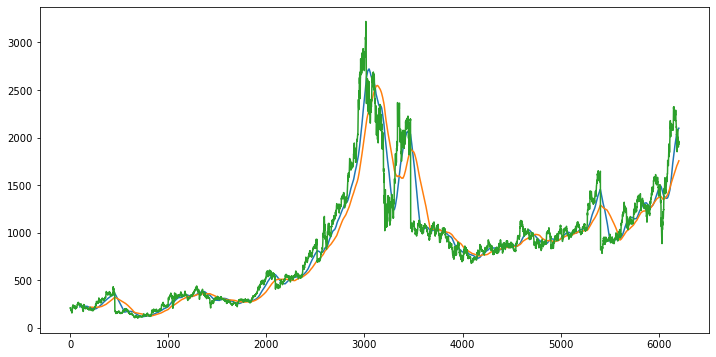

In [10]:
st.subheader('Closing Price vs Time chart with 100MA & 200 MA')
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()
fig = plt.figure(figsize =(12,6))
plt.plot(ma100)
plt.plot(ma200)
plt.plot(df.Close)
st.pyplot(fig)

In [11]:
#Splitting the data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing  = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_training_array = scaler.fit_transform(data_training)

In [14]:
#Splitting Data into x_train and y_train
x_train = []
y_train = [] 


In [15]:
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

In [16]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [17]:
#Load the model
model = load_model('keras_model.h5')

In [18]:
#Testing part

past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index = True)
input_data = scaler.fit_transform(final_df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13276\3373284366.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [19]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [20]:
x_test, y_test = np.array(x_test), np.array(y_test)
y_predicted = model.predict(x_test)
scaler = scaler.scale_

59/59 [==============================] - 4s 53ms/step


In [21]:
scale_factor = 1/scaler[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

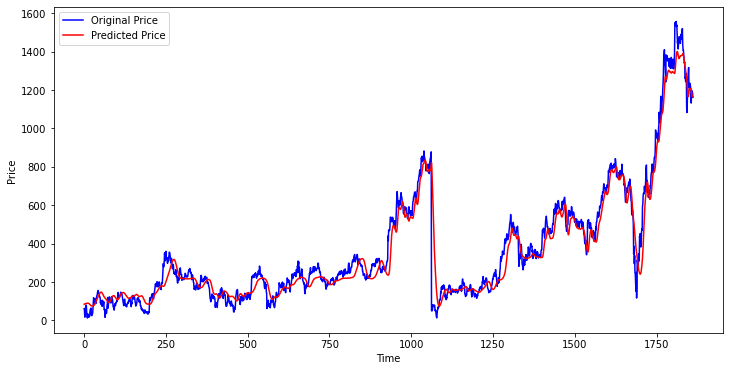

In [22]:
#Final Graph

st.subheader('Predicted vs Original')
fig2 = plt.figure(figsize=(12,6))
plt.plot(y_test,'blue',label = 'Original Price')
plt.plot(y_predicted,'red',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
st.pyplot(fig2)